# **US Tornados Data Analysis**
## *Tornados in the US from 1950 to 2021*
### By: Luke Sullivan
### Date: 22 April 2024

Dataset used: [US Tornado Dataset 1950-2021](https://www.kaggle.com/datasets/danbraswell/us-tornado-dataset-1950-2021?resource=download">https://www.kaggle.com/datasets/danbraswell/us-tornado-dataset-1950-2021)

---
**Dataset Definitions**

This dataset was derived from a dataset produced by National Oceanic and Atmospheric Administration (NOAA) Storm Prediction Center.

<p style="text-align:center"><b>The dataset contains the following columns:</b></p>

| Header | Description |
| ----------| ---------|
| yr | 4-digit year |
| mo | Month (1-12) |
| dy | Day of month |
| date | Datetime object (e.g. 2020-01-01)
| st | State where tornado originated |
| mag | Enhanced Fujita Scale rating |
| inj | Number of injuries |
| fat | Number of fatalities |
| slat | Starting latitude |
| slon | Starting longitude |
| elat | Ending latitude |
| elon | Ending longitude |
| len | length of track (mi) |
| wid | Width (yds) |

**The Enhanced Fujita Scale**

A tornado's destructiveness is derived largely from teh wind speed within it. Meteorologists use this Enhanced Fujita Scale since 2007 to rate tornadoes based on wind speed.

| Rate | Wind Speed | Damage |
| ----------| ---------| --------- |
| EF0 | 65-85 mph | Light damage |
| EF1 | 86-110 mph |  Moderate damage |
| EF2 | 111-135 mph | Considerable damage |
| EF3 | 136–165 mph | Severe damage |
| EF4 | 166–200 mph | Devastating damage |
| EF5 | >200 mph | Incredible damage |

# Research Question
1. Do states that experience more rainfall also experience more tornados?

In [64]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats import mstats
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, RobustScaler
standard_scaler = StandardScaler()
label_encoder = LabelEncoder()

## Data Preprocessing

In [2]:
#load data in dataframe
data = pd.read_csv("us_tornado_dataset_1950_2021.csv");
data.head(3)

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10


In [3]:
print("########DATA SHAPE########")
print(data.shape)
print("########DATA TYPES########")
print(data.dtypes)

########DATA SHAPE########
(67558, 14)
########DATA TYPES########
yr        int64
mo        int64
dy        int64
date     object
st       object
mag       int64
inj       int64
fat       int64
slat    float64
slon    float64
elat    float64
elon    float64
len     float64
wid       int64
dtype: object


In [4]:
print("########NULL VALUES########")
print(data.isnull().sum())

########NULL VALUES########
yr      0
mo      0
dy      0
date    0
st      0
mag     0
inj     0
fat     0
slat    0
slon    0
elat    0
elon    0
len     0
wid     0
dtype: int64


In [5]:
print("sLon:", data.slon[data.slon==0].count())
print("sLat:", data.slat[data.slat==0].count())

print("eLon:", data.elon[data.elon==0].count())
print("eLat:", data.elat[data.elat==0].count())

sLon: 0
sLat: 0
eLon: 26363
eLat: 26363


In [6]:
#Data says that magnitutde is filled with "-9" for unknown ratings.
print("Missing mag count:", data.mag[data.mag==-9].count())
print("Missing mag compared to total rows: ", data.mag[data.mag==-9].count() / data.shape[0])

Missing mag count: 605
Missing mag compared to total rows:  0.008955268065958139


In [7]:
data.query('mag == -9')

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
60343,2016,4,15,2016-04-15,CO,-9,0,0,38.3743,-102.8185,38.4299,-102.8225,3.85,150
60344,2016,4,15,2016-04-15,CO,-9,0,0,38.4046,-102.8083,38.4118,-102.8082,0.50,100
60345,2016,4,15,2016-04-15,CO,-9,0,0,38.4773,-102.7234,38.4944,-102.7191,1.20,100
60346,2016,4,15,2016-04-15,CO,-9,0,0,38.1773,-102.7907,38.1852,-102.7865,0.59,100
60480,2016,5,8,2016-05-08,OK,-9,0,0,34.5810,-98.0760,34.5810,-98.0530,1.30,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67417,2021,12,15,2021-12-15,IA,-9,0,0,41.9551,-95.5749,42.0074,-95.5266,4.39,50
67418,2021,12,15,2021-12-15,IA,-9,0,0,42.5620,-95.4050,42.5850,-95.3880,1.81,50
67419,2021,12,15,2021-12-15,IA,-9,0,0,42.2525,-94.6317,42.2708,-94.6236,1.33,40
67420,2021,12,15,2021-12-15,IA,-9,0,0,42.5797,-94.5775,42.5920,-94.5657,1.04,40


In [8]:
data['mag'] = data['mag'].replace(-9, 0)
data.query('mag == -9')

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid


In [9]:
data['state_encoded'] = label_encoder.fit_transform(data['st'])
data.head(3)

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid,state_encoded
0,1950,1,3,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130,14
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150,24
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10,35


In [10]:
data.describe()

,yr,mo,dy,mag,inj,fat,slat,slon,elat,elon,len,wid,state_encoded
count,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000,67558.000000
mean,1991.341618,5.976761,15.921016,0.771870,1.437876,0.090470,37.142412,-92.784618,22.730695,-56.245590,3.478340,106.577030,25.327082
std,19.330015,2.438192,8.736773,0.896514,18.263956,1.484106,5.093979,8.689103,18.588638,45.489157,8.278775,205.802676,14.434335
min,1950.000000,1.000000,1.000000,0.000000,0.000000,0.000000,17.721200,-163.530000,0.000000,-163.530000,0.000000,0.000000,0.000000
25%,1976.000000,4.000000,8.000000,0.000000,0.000000,0.000000,33.220000,-98.450000,0.000000,-94.709800,0.100000,20.000000,14.000000
50%,1994.000000,6.000000,16.000000,1.000000,0.000000,0.000000,37.030000,-93.600000,32.480000,-84.420000,0.800000,50.000000,24.000000
75%,2008.000000,7.000000,24.000000,1.000000,0.000000,0.000000,40.930000,-86.730000,38.610000,0.000000,3.130000,100.000000,39.000000
max,2021.000000,12.000000,31.000000,5.000000,1740.000000,158.000000,61.020000,-64.715100,61.020000,0.000000,234.700000,4576.000000,52.000000


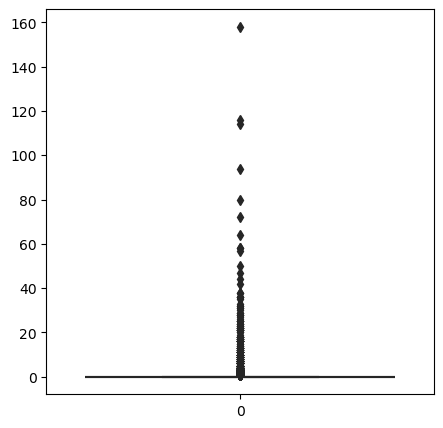

In [11]:
plt.figure(figsize=[5,5])
sns.boxplot(data['fat'], color='purple')
plt.show()

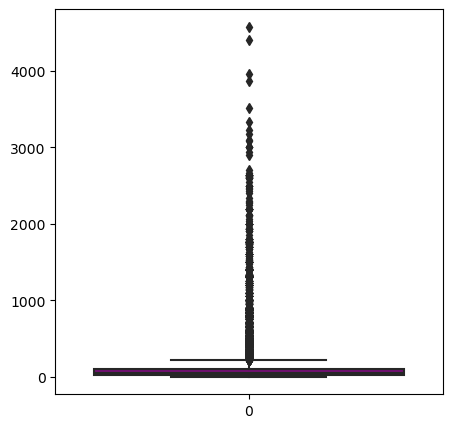

In [12]:
plt.figure(figsize=[5,5])
sns.boxplot(data['wid'], color='purple')
plt.show()

In [13]:
#data['len'] = mstats.winsorize(data['len'], limits=[0.05, 0.05])
#data['wid'] = mstats.winsorize(data['wid'], limits=[0.05, 0.05])
#data['inj'] = mstats.winsorize(data['inj'], limits=[0.05, 0.05])
#data['fat'] = mstats.winsorize(data['fat'], limits=[0.05, 0.05])

In [14]:
data.wid.unique()

array([ 130,  150,   10,   17,  100,  300,  133,  400,   67, 1000,   33,
        233,  833,   50,   27,  600,  200, 1760,   77,   37,  293,  440,
         30,  660,  467,  333,  250,   40,  880,  267,  700,  220,  167,
         90,   13,  500,  317,   20,  123,   73,  127,  900,  217,  450,
        173,  350,  330,  110,   57,  140,  230,  177,  587,  650,  417,
        427,   83,   60,   43, 1300,   70,  867,   80,  750,   23,   97,
        583,  433,  147,  667, 1417, 1320, 1480,   53,   47,  883,  137,
        210,  163,  800,  227, 1100,  790,  207,  223,   25,  313,  120,
         63,  367,  117, 1333,  533, 1200,  183, 1667,  320, 1500,  283,
        180,  280,  550,  187,  517, 2000,  817, 1400, 1600, 1167,  160,
        733,  327,  243,   87,  647,  527,  253,  143,  115,  277,   93,
       3000, 2667,  193, 2933,  360,  290, 2200, 1133, 2500,  213,  107,
       1700, 2630,  270, 1583,  373,  613,  850,  170,  420, 1056,  567,
        530, 1707, 1733, 2333,  847, 1533,  713, 10

In [15]:
column_names = {'mag': 'Magnitude',
                'inj': 'Injuries',
                'fat': 'Deaths',
                'st': 'State',
                'len': 'Length',
                'wid': 'Width'}
data.rename(columns=column_names, inplace=True)

In [16]:
data.head(10)

,yr,mo,dy,date,State,Magnitude,Injuries,Deaths,slat,slon,elat,elon,Length,Width,state_encoded
0,1950,1,3,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130,14
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150,24
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10,35
3,1950,1,13,1950-01-13,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17,2
4,1950,1,25,1950-01-25,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100,14
5,1950,1,25,1950-01-25,MO,2,5,0,37.60,-90.68,37.63,-90.65,2.3,300,24
6,1950,1,26,1950-01-26,TX,2,2,0,26.88,-98.12,26.88,-98.05,4.7,133,44
7,1950,2,11,1950-02-11,TX,2,0,0,29.42,-95.25,29.52,-95.13,9.9,400,44
8,1950,2,11,1950-02-11,TX,2,5,0,32.35,-95.20,32.42,-95.20,4.6,100,44
9,1950,2,11,1950-02-11,TX,2,6,0,32.98,-94.63,33.00,-94.70,4.5,67,44


In [17]:
##dataset 2
weather_data = pd.read_parquet('daily_weather.parquet')
weather_data.head()

,station_id,city_name,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
0,41515,Asadabad,1957-07-01,Summer,27.0,21.1,35.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,41515,Asadabad,1957-07-02,Summer,22.8,18.9,32.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,41515,Asadabad,1957-07-03,Summer,24.3,16.7,35.6,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,41515,Asadabad,1957-07-04,Summer,26.6,16.1,37.8,4.1,NaN,NaN,NaN,NaN,NaN,NaN
4,41515,Asadabad,1957-07-05,Summer,30.8,20.0,41.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
city_data = pd.read_csv('weather_cities.csv')
city_data.head()

,station_id,city_name,country,state,iso2,iso3,latitude,longitude
0,41515,Asadabad,Afghanistan,Kunar,AF,AFG,34.866000,71.150005
1,38954,Fayzabad,Afghanistan,Badakhshan,AF,AFG,37.129761,70.579247
2,41560,Jalalabad,Afghanistan,Nangarhar,AF,AFG,34.441527,70.436103
3,38947,Kunduz,Afghanistan,Kunduz,AF,AFG,36.727951,68.872530
4,38987,Qala i Naw,Afghanistan,Badghis,AF,AFG,34.983000,63.133300


In [19]:
weather_data = pd.merge(weather_data, city_data, on='station_id', how='left')
weather_data.head()

,station_id,city_name_x,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,...,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min,city_name_y,country,state,iso2,iso3,latitude,longitude
0,41515,Asadabad,1957-07-01,Summer,27.0,21.1,35.6,0.0,NaN,NaN,...,NaN,NaN,NaN,Asadabad,Afghanistan,Kunar,AF,AFG,34.866,71.150005
1,41515,Asadabad,1957-07-02,Summer,22.8,18.9,32.2,0.0,NaN,NaN,...,NaN,NaN,NaN,Asadabad,Afghanistan,Kunar,AF,AFG,34.866,71.150005
2,41515,Asadabad,1957-07-03,Summer,24.3,16.7,35.6,1.0,NaN,NaN,...,NaN,NaN,NaN,Asadabad,Afghanistan,Kunar,AF,AFG,34.866,71.150005
3,41515,Asadabad,1957-07-04,Summer,26.6,16.1,37.8,4.1,NaN,NaN,...,NaN,NaN,NaN,Asadabad,Afghanistan,Kunar,AF,AFG,34.866,71.150005
4,41515,Asadabad,1957-07-05,Summer,30.8,20.0,41.7,0.0,NaN,NaN,...,NaN,NaN,NaN,Asadabad,Afghanistan,Kunar,AF,AFG,34.866,71.150005


In [20]:
us_count = weather_data['country'].value_counts().get('United States of America', 0)
print(us_count)

1481287


In [21]:
weather_data = weather_data[weather_data['country'] == 'United States of America']
weather_data.head()

,station_id,city_name_x,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,...,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min,city_name_y,country,state,iso2,iso3,latitude,longitude
25761028,72518,Albany,1938-06-01,Summer,NaN,8.3,26.7,0.0,0.0,NaN,...,NaN,NaN,NaN,Albany,United States of America,New York,US,USA,42.670017,-73.819949
25761029,72518,Albany,1938-06-02,Summer,NaN,9.4,26.1,5.1,0.0,NaN,...,NaN,NaN,NaN,Albany,United States of America,New York,US,USA,42.670017,-73.819949
25761030,72518,Albany,1938-06-03,Summer,NaN,13.9,23.3,4.1,0.0,NaN,...,NaN,NaN,NaN,Albany,United States of America,New York,US,USA,42.670017,-73.819949
25761031,72518,Albany,1938-06-04,Summer,NaN,9.4,25.0,0.0,0.0,NaN,...,NaN,NaN,NaN,Albany,United States of America,New York,US,USA,42.670017,-73.819949
25761032,72518,Albany,1938-06-05,Summer,NaN,13.3,22.2,0.0,0.0,NaN,...,NaN,NaN,NaN,Albany,United States of America,New York,US,USA,42.670017,-73.819949


In [22]:
print(weather_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1481287 entries, 25761028 to 27242314
Data columns (total 21 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   station_id              1481287 non-null  object        
 1   city_name_x             1481287 non-null  category      
 2   date                    1481287 non-null  datetime64[us]
 3   season                  1481287 non-null  category      
 4   avg_temp_c              935601 non-null   float64       
 5   min_temp_c              1478703 non-null  float64       
 6   max_temp_c              1478761 non-null  float64       
 7   precipitation_mm        1458046 non-null  float64       
 8   snow_depth_mm           1303778 non-null  float64       
 9   avg_wind_dir_deg        456770 non-null   float64       
 10  avg_wind_speed_kmh      948369 non-null   float64       
 11  peak_wind_gust_kmh      432928 non-null   float64       
 12  avg_sea_lev

In [23]:
weather_data.shape

(1481287, 21)

In [24]:
weather_data.date.duplicated().sum()

1430272

In [25]:
data.State.unique()

array(['IL', 'MO', 'OH', 'AR', 'TX', 'LA', 'MS', 'TN', 'OK', 'FL', 'AL',
       'SC', 'KS', 'IA', 'NE', 'SD', 'WY', 'NC', 'GA', 'ND', 'MN', 'WI',
       'IN', 'PA', 'NM', 'CT', 'CO', 'WV', 'MD', 'KY', 'CA', 'VA', 'NJ',
       'MI', 'MA', 'NH', 'OR', 'NY', 'MT', 'AZ', 'UT', 'ME', 'VT', 'ID',
       'WA', 'DE', 'HI', 'PR', 'AK', 'NV', 'RI', 'DC', 'VI'], dtype=object)

In [26]:
state_mapping = {
    'Illinois': 'IL', 'Missouri': 'MO', 'Ohio': 'OH', 'Arkansas': 'AR', 'Texas': 'TX',
    'Louisiana': 'LA', 'Mississippi': 'MS', 'Tennessee': 'TN', 'Oklahoma': 'OK', 'Florida': 'FL',
    'Alabama': 'AL', 'South Carolina': 'SC', 'Kansas': 'KS', 'Iowa': 'IA', 'Nebraska': 'NE',
    'South Dakota': 'SD', 'Wyoming': 'WY', 'North Carolina': 'NC', 'Georgia': 'GA', 'North Dakota': 'ND',
    'Minnesota': 'MN', 'Wisconsin': 'WI', 'Indiana': 'IN', 'Pennsylvania': 'PA', 'New Mexico': 'NM',
    'Connecticut': 'CT', 'Colorado': 'CO', 'West Virginia': 'WV', 'Maryland': 'MD', 'Kentucky': 'KY',
    'California': 'CA', 'Virginia': 'VA', 'New Jersey': 'NJ', 'Michigan': 'MI', 'Massachusetts': 'MA',
    'New Hampshire': 'NH', 'Oregon': 'OR', 'New York': 'NY', 'Montana': 'MT', 'Arizona': 'AZ',
    'Utah': 'UT', 'Maine': 'ME', 'Vermont': 'VT', 'Idaho': 'ID', 'Washington': 'WA', 'Delaware': 'DE',
    'Hawaii': 'HI', 'Puerto Rico': 'PR', 'Alaska': 'AK', 'Nevada': 'NV', 'Rhode Island': 'RI',
    'District of Columbia': 'DC', 'Virgin Islands': 'VI'
}

weather_data['state'] = weather_data['state'].map(state_mapping)

In [27]:
weather_data.state.unique()

array(['NY', 'MD', 'GA', 'ME', 'TX', 'ND', 'ID', 'MA', 'NV', 'WV', 'WY',
       'SC', 'OH', 'NH', 'CO', 'IA', 'DE', 'KY', 'PA', 'CT', 'MT', 'HI',
       'IN', 'MS', 'MO', 'AK', 'MI', 'NE', 'AR', 'WI', 'AL', 'VT', 'TN',
       'OK', 'WA', 'AZ', 'RI', 'NC', 'VA', 'CA', 'MN', 'OR', 'UT', 'NM',
       'IL', 'FL', 'KS', 'NJ', 'DC'], dtype=object)

In [28]:
statechange = {'state': 'State'}
weather_data.rename(columns=statechange, inplace=True)
weather_data.head(1)

,station_id,city_name_x,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,...,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min,city_name_y,country,State,iso2,iso3,latitude,longitude
25761028,72518,Albany,1938-06-01,Summer,NaN,8.3,26.7,0.0,0.0,NaN,...,NaN,NaN,NaN,Albany,United States of America,NY,US,USA,42.670017,-73.819949


In [29]:
weather_data.isnull().sum()

station_id                      0
city_name_x                     0
date                            0
season                          0
avg_temp_c                 545686
min_temp_c                   2584
max_temp_c                   2526
precipitation_mm            23241
snow_depth_mm              177509
avg_wind_dir_deg          1024517
avg_wind_speed_kmh         532918
peak_wind_gust_kmh        1048359
avg_sea_level_pres_hpa     617464
sunshine_total_min         971919
city_name_y                     0
country                         0
State                           0
iso2                            0
iso3                            0
latitude                        0
longitude                       0
dtype: int64

In [30]:
weather_data.isnull()

,station_id,city_name_x,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,...,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min,city_name_y,country,State,iso2,iso3,latitude,longitude
25761028,False,False,False,False,True,False,False,False,False,True,...,True,True,True,False,False,False,False,False,False,False
25761029,False,False,False,False,True,False,False,False,False,True,...,True,True,True,False,False,False,False,False,False,False
25761030,False,False,False,False,True,False,False,False,False,True,...,True,True,True,False,False,False,False,False,False,False
25761031,False,False,False,False,True,False,False,False,False,True,...,True,True,True,False,False,False,False,False,False,False
25761032,False,False,False,False,True,False,False,False,False,True,...,True,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27242310,False,False,False,False,False,False,False,True,True,False,...,True,False,True,False,False,False,False,False,False,False
27242311,False,False,False,False,False,False,False,True,True,False,...,True,False,True,False,False,False,False,False,False,False
27242312,False,False,False,False,False,False,False,True,True,False,...,True,False,True,False,False,False,False,False,False,False
27242313,False,False,False,False,False,False,False,True,True,False,...,True,False,True,False,False,False,False,False,False,False


In [31]:
precip_avg = weather_data.dropna(subset=['precipitation_mm']).groupby(['State', 'season'])['precipitation_mm'].mean()

C:\Users\theel\AppData\Local\Temp\ipykernel_30544\2672039020.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precip_avg = weather_data.dropna(subset=['precipitation_mm']).groupby(['State', 'season'])['precipitation_mm'].mean()


In [32]:
precip_avg.NY.head

<bound method NDFrame.head of season
Autumn    2.707020
Spring    2.582427
Summer    3.002769
Winter    2.163742
Name: precipitation_mm, dtype: float64>

In [33]:
weather_data = pd.merge(weather_data, precip_avg.reset_index(), on=['State', 'season'], how='left', suffixes=('','_avg'))
weather_data.precipitation_mm_avg.head()

0    3.002769
1    3.002769
2    3.002769
3    3.002769
4    3.002769
Name: precipitation_mm_avg, dtype: float64

In [34]:
weather_data['precipitation_mm'].fillna(weather_data['precipitation_mm_avg'], inplace=True)
weather_data.drop(columns=['precipitation_mm_avg'], inplace=True)
weather_data.head()

,station_id,city_name_x,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,...,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min,city_name_y,country,State,iso2,iso3,latitude,longitude
0,72518,Albany,1938-06-01,Summer,NaN,8.3,26.7,0.0,0.0,NaN,...,NaN,NaN,NaN,Albany,United States of America,NY,US,USA,42.670017,-73.819949
1,72518,Albany,1938-06-02,Summer,NaN,9.4,26.1,5.1,0.0,NaN,...,NaN,NaN,NaN,Albany,United States of America,NY,US,USA,42.670017,-73.819949
2,72518,Albany,1938-06-03,Summer,NaN,13.9,23.3,4.1,0.0,NaN,...,NaN,NaN,NaN,Albany,United States of America,NY,US,USA,42.670017,-73.819949
3,72518,Albany,1938-06-04,Summer,NaN,9.4,25.0,0.0,0.0,NaN,...,NaN,NaN,NaN,Albany,United States of America,NY,US,USA,42.670017,-73.819949
4,72518,Albany,1938-06-05,Summer,NaN,13.3,22.2,0.0,0.0,NaN,...,NaN,NaN,NaN,Albany,United States of America,NY,US,USA,42.670017,-73.819949


In [35]:
# someone left the game LOL TILTED
weather_data.query('precipitation_mm == 0')

,station_id,city_name_x,date,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,...,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min,city_name_y,country,State,iso2,iso3,latitude,longitude
0,72518,Albany,1938-06-01,Summer,NaN,8.3,26.7,0.0,0.0,NaN,...,NaN,NaN,NaN,Albany,United States of America,NY,US,USA,42.670017,-73.819949
3,72518,Albany,1938-06-04,Summer,NaN,9.4,25.0,0.0,0.0,NaN,...,NaN,NaN,NaN,Albany,United States of America,NY,US,USA,42.670017,-73.819949
4,72518,Albany,1938-06-05,Summer,NaN,13.3,22.2,0.0,0.0,NaN,...,NaN,NaN,NaN,Albany,United States of America,NY,US,USA,42.670017,-73.819949
5,72518,Albany,1938-06-06,Summer,NaN,7.2,26.1,0.0,0.0,NaN,...,NaN,NaN,NaN,Albany,United States of America,NY,US,USA,42.670017,-73.819949
6,72518,Albany,1938-06-07,Summer,NaN,17.2,31.7,0.0,0.0,NaN,...,NaN,NaN,NaN,Albany,United States of America,NY,US,USA,42.670017,-73.819949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1481269,72405,Washington,2023-08-19,Summer,23.2,17.8,28.9,0.0,NaN,276.0,...,NaN,1018.0,NaN,Washington,United States of America,DC,US,USA,38.899549,-77.009419
1481270,72405,Washington,2023-08-20,Summer,24.7,18.9,31.1,0.0,0.0,177.0,...,NaN,1019.7,NaN,Washington,United States of America,DC,US,USA,38.899549,-77.009419
1481271,72405,Washington,2023-08-21,Summer,27.6,22.8,33.3,0.0,0.0,323.0,...,NaN,1018.5,NaN,Washington,United States of America,DC,US,USA,38.899549,-77.009419
1481272,72405,Washington,2023-08-22,Summer,26.9,21.1,28.9,0.0,0.0,11.0,...,NaN,1018.4,NaN,Washington,United States of America,DC,US,USA,38.899549,-77.009419


In [36]:
weather_data.precipitation_mm.isnull().sum()#POGGERS!!!


0

In [37]:
weather_data.dtypes

station_id                        object
city_name_x                     category
date                      datetime64[us]
season                          category
avg_temp_c                       float64
min_temp_c                       float64
max_temp_c                       float64
precipitation_mm                 float64
snow_depth_mm                    float64
avg_wind_dir_deg                 float64
avg_wind_speed_kmh               float64
peak_wind_gust_kmh               float64
avg_sea_level_pres_hpa           float64
sunshine_total_min               float64
city_name_y                       object
country                           object
State                             object
iso2                              object
iso3                              object
latitude                         float64
longitude                        float64
dtype: object

In [38]:
us_count = weather_data['precipitation_mm'].value_counts().get(2.5, 0)
print(us_count)

10603


In [39]:
data.shape

(67558, 15)

In [40]:
data['date'] = pd.to_datetime(data['date'])

In [41]:
tornado_data = pd.merge(data, weather_data, on=['date', 'State'], how='left')
tornado_data.shape

(67558, 34)

In [42]:
tornado_data.isnull().sum()

yr                            0
mo                            0
dy                            0
date                          0
State                         0
Magnitude                     0
Injuries                      0
Deaths                        0
slat                          0
slon                          0
elat                          0
elon                          0
Length                        0
Width                         0
state_encoded                 0
station_id                 6369
city_name_x                6369
season                     6369
avg_temp_c                23507
min_temp_c                 6373
max_temp_c                 6373
precipitation_mm           6369
snow_depth_mm             11010
avg_wind_dir_deg          43928
avg_wind_speed_kmh        20315
peak_wind_gust_kmh        47434
avg_sea_level_pres_hpa    31575
sunshine_total_min        39793
city_name_y                6369
country                    6369
iso2                       6369
iso3    

In [44]:
drop_columns = ['country', 'iso2', 'iso3', 'latitude', 'longitude', 'station_id', 'sunshine_total_min', 'avg_sea_level_pres_hpa',
               'peak_wind_gust_kmh', 'avg_wind_dir_deg', 'snow_depth_mm', 'avg_wind_speed_kmh', 'city_name_x', 'city_name_y']
tornado_data.drop(columns=drop_columns, inplace=True)

In [45]:
tornado_data.isnull().sum()

yr                      0
mo                      0
dy                      0
date                    0
State                   0
Magnitude               0
Injuries                0
Deaths                  0
slat                    0
slon                    0
elat                    0
elon                    0
Length                  0
Width                   0
state_encoded           0
season               6369
avg_temp_c          23507
min_temp_c           6373
max_temp_c           6373
precipitation_mm     6369
dtype: int64

In [46]:
tornado_data.season.unique()

['Winter', NaN, 'Spring', 'Summer', 'Autumn']
Categories (4, object): ['Autumn', 'Spring', 'Summer', 'Winter']

In [47]:
#Funtion to fill NaN values in the [Season] column, based on the month provided in [Date]
def get_season(month):
    if month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

In [48]:
print("Season NaN total:", tornado_data.season.isnull().sum())
tornado_data['season'] = tornado_data['season'].fillna(tornado_data['mo'].apply(get_season))
print("Season NaN total:", tornado_data.season.isnull().sum())

Season NaN total: 6369
Season NaN total: 0


In [49]:
tornado_data.head()

,yr,mo,dy,date,State,Magnitude,Injuries,Deaths,slat,slon,elat,elon,Length,Width,state_encoded,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm
0,1950,1,3,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130,14,Winter,NaN,-6.1,15.6,31.5
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150,24,Winter,NaN,NaN,NaN,NaN
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10,35,Winter,13.2,11.7,17.8,17.5
3,1950,1,13,1950-01-13,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17,2,Winter,NaN,NaN,NaN,NaN
4,1950,1,25,1950-01-25,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100,14,Winter,NaN,-2.8,21.1,19.6


In [50]:
#Fill [min_temp_c] and [max_temp_c] with average temp according to season.
avg_temps = tornado_data.groupby('season')[['min_temp_c', 'max_temp_c']].median()

for season, avg_temp_row in avg_temps.iterrows():
    tornado_data.loc[tornado_data['season'] == season, 'min_temp_c'] = tornado_data.loc[tornado_data['season'] == season, 'min_temp_c'].fillna(avg_temp_row['min_temp_c'])
    tornado_data.loc[tornado_data['season'] == season, 'max_temp_c'] = tornado_data.loc[tornado_data['season'] == season, 'max_temp_c'].fillna(avg_temp_row['max_temp_c'])

C:\Users\theel\AppData\Local\Temp\ipykernel_30544\200121479.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_temps = tornado_data.groupby('season')[['min_temp_c', 'max_temp_c']].median()


In [51]:
#To fill the [avg_temp_c], I took the average of the min and max temps to get a more accurate estimate.
tornado_data['avg_temp_c'] = tornado_data['avg_temp_c'].fillna((tornado_data['min_temp_c'] + tornado_data['max_temp_c']) / 2)

In [52]:
tornado_data.isnull().sum()

yr                     0
mo                     0
dy                     0
date                   0
State                  0
Magnitude              0
Injuries               0
Deaths                 0
slat                   0
slon                   0
elat                   0
elon                   0
Length                 0
Width                  0
state_encoded          0
season                 0
avg_temp_c             0
min_temp_c             0
max_temp_c             0
precipitation_mm    6369
dtype: int64

In [55]:
for i, row in tornado_data.iterrows():
    state = row['State']
    season = row['season']
    if pd.isna(row['precipitation_mm']):
        tornado_data.at[i, 'precipitation_mm'] = precip_avg.get((state, season), None)

tornado_data.precipitation_mm.isnull().sum()

4112

In [62]:
tornado_data = tornado_data.dropna()
tornado_data.isnull().sum()

yr                  0
mo                  0
dy                  0
date                0
State               0
Magnitude           0
Injuries            0
Deaths              0
slat                0
slon                0
elat                0
elon                0
Length              0
Width               0
state_encoded       0
season              0
avg_temp_c          0
min_temp_c          0
max_temp_c          0
precipitation_mm    0
dtype: int64

In [63]:
tornado_data.head()

,yr,mo,dy,date,State,Magnitude,Injuries,Deaths,slat,slon,elat,elon,Length,Width,state_encoded,season,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm
0,1950,1,3,1950-01-03,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130,14,Winter,4.75,-6.1,15.6,31.500000
1,1950,1,3,1950-01-03,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150,24,Winter,13.60,7.8,19.4,1.773296
2,1950,1,3,1950-01-03,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10,35,Winter,13.20,11.7,17.8,17.500000
3,1950,1,13,1950-01-13,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17,2,Winter,13.60,7.8,19.4,3.509785
4,1950,1,25,1950-01-25,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100,14,Winter,9.15,-2.8,21.1,19.600000


### Standardization with RobustScaler

In [67]:
standardize = tornado_data[['Injuries', 'Deaths', 'Length', 'Width', 'avg_temp_c', 'min_temp_c', 'max_temp_c', 'precipitation_mm']]
other_data = tornado_data[['Magnitude','yr', 'mo', 'dy', 'date', 'State', 'state_encoded', 'slat', 'slon', 'elat', 'elon']]
s_tornado_data = standard_scaler.fit_transform(standardize)
s_tornado_data = pd.concat([pd.DataFrame(s_tornado_data, columns=standardize.columns), other_data], axis=1)
dtype_dict = {'yr': 'int32', 'mo': 'int32', 'dy': 'int32'}
s_tornado_data.head()

,Injuries,Deaths,Length,Width,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,Magnitude,yr,mo,dy,date,State,state_encoded,slat,slon,elat,elon
0,0.082023,-0.061198,0.011501,0.109835,-3.085839,-3.757656,-1.919498,0.854625,3.0,1950.0,1.0,3.0,1950-01-03,IL,14.0,39.10,-89.30,39.12,-89.23
1,0.082023,-0.061198,0.724531,0.206864,-1.375399,-1.307718,-1.238971,-0.552520,3.0,1950.0,1.0,3.0,1950-01-03,MO,24.0,38.77,-90.22,38.83,-90.03
2,-0.025213,-0.061198,-0.411484,-0.472334,-1.452707,-0.620325,-1.525508,0.191920,1.0,1950.0,1.0,3.0,1950-01-03,OH,35.0,40.88,-84.58,0.00,0.00
3,-0.025213,0.599699,-0.351057,-0.438374,-1.375399,-1.307718,-1.238971,-0.470321,3.0,1950.0,1.0,13.0,1950-01-13,AR,2.0,34.40,-94.37,0.00,0.00
4,-0.078831,-0.061198,-0.411484,-0.035707,-2.235450,-3.176016,-0.934524,0.291326,2.0,1950.0,1.0,25.0,1950-01-25,IL,14.0,41.17,-87.33,0.00,0.00


## Data Exploration
---

### Have tornados increased or decreased over the years?

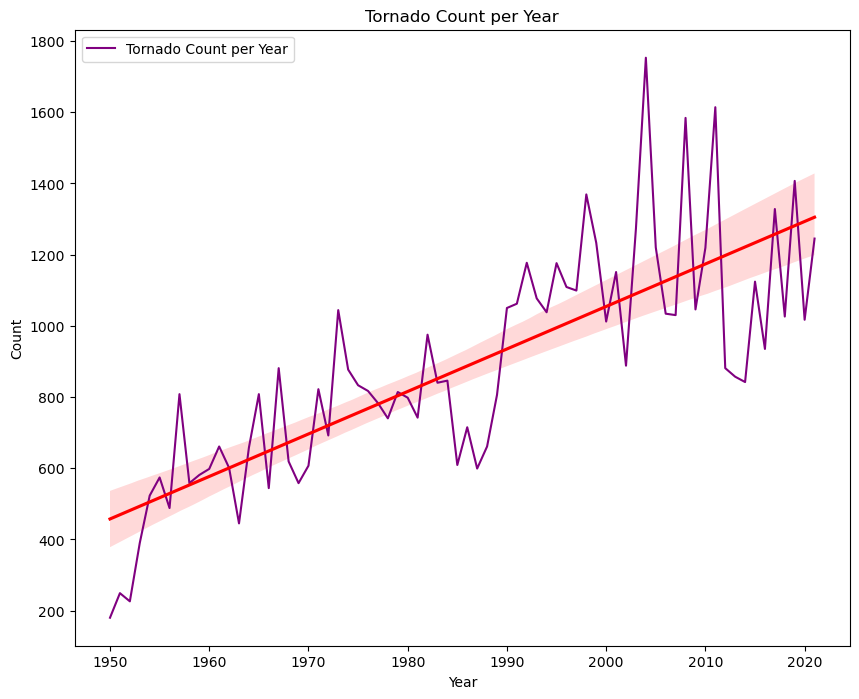

In [85]:
tornado_count = s_tornado_data.groupby('yr').Magnitude.count()

plt.figure(figsize=[10, 8])
plt.plot(x, y, color="purple", label='Tornado Count per Year')
sns.regplot(x=tornado_count.index, y=tornado_count, scatter=False, color='red')  # Plot the regression line
plt.title('Tornado Count per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

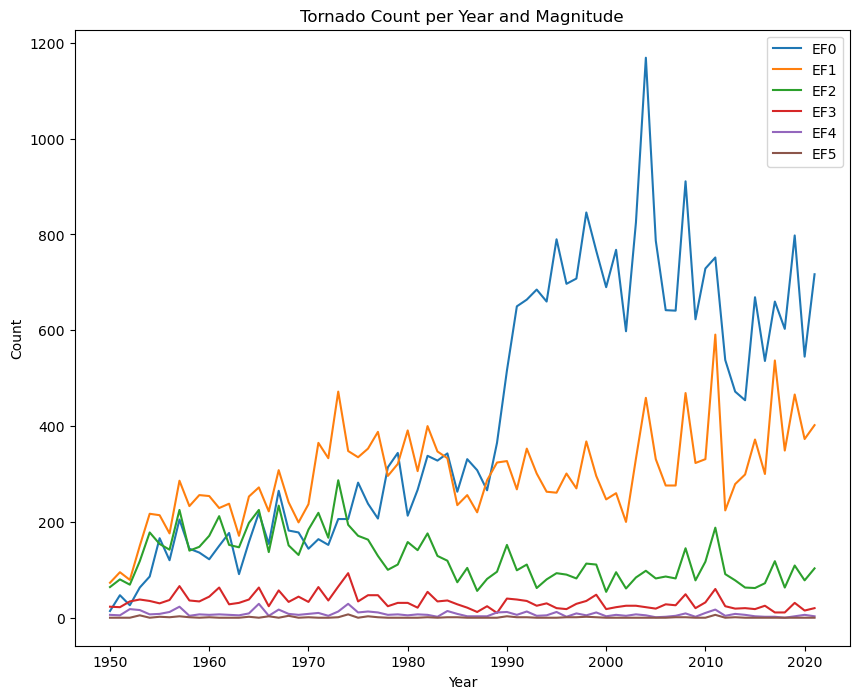

In [86]:
tornado_counts = s_tornado_data.groupby(['yr', 'Magnitude']).size().unstack(fill_value=0)

x = tornado_counts.index.values

plt.figure(figsize=[10, 8])

for magnitude in range(0, 6):
    y = tornado_counts[magnitude].values
    plt.plot(x, y, label=f'EF{magnitude}')

plt.title('Tornado Count per Year and Magnitude')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

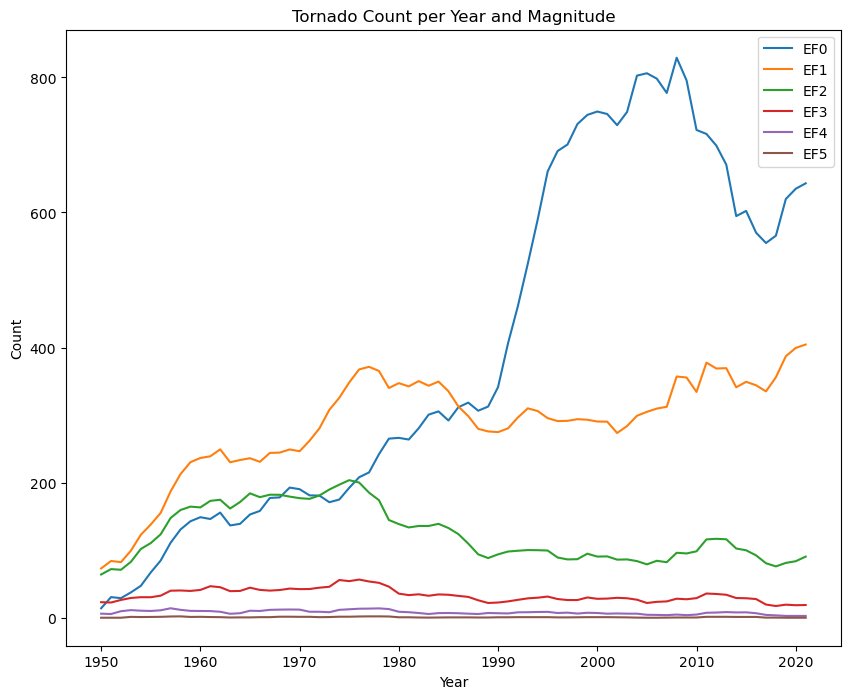

In [87]:
rolling_avg = tornado_counts.rolling(window=6, min_periods=1).mean()

x = rolling_avg.index.values

plt.figure(figsize=[10, 8])

# Plot each magnitude level as a separate line
for magnitude in range(0, 6):
    y = rolling_avg[magnitude].values
    plt.plot(x, y, label=f'EF{magnitude}')
    
plt.title('Tornado Count per Year and Magnitude')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()
plt.show()

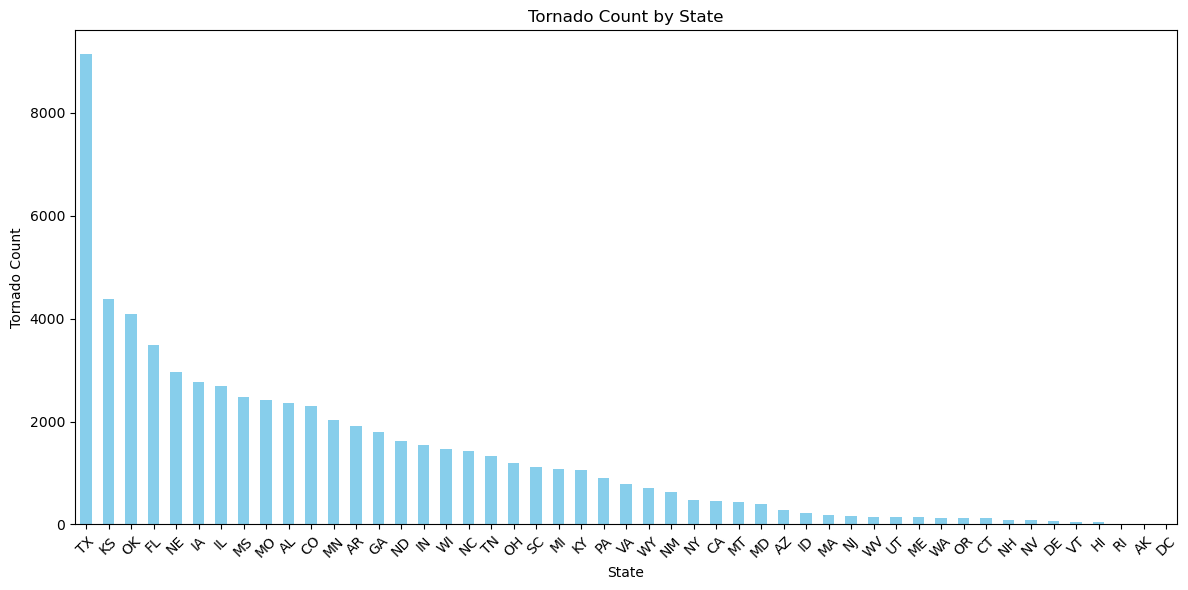

In [100]:
state_counts = s_tornado_data['State'].value_counts()

plt.figure(figsize=[12,6])
state_counts.plot(kind='bar', color='skyblue')

plt.xlabel('State')
plt.ylabel('Tornado Count')
plt.title('Tornado Count by State')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

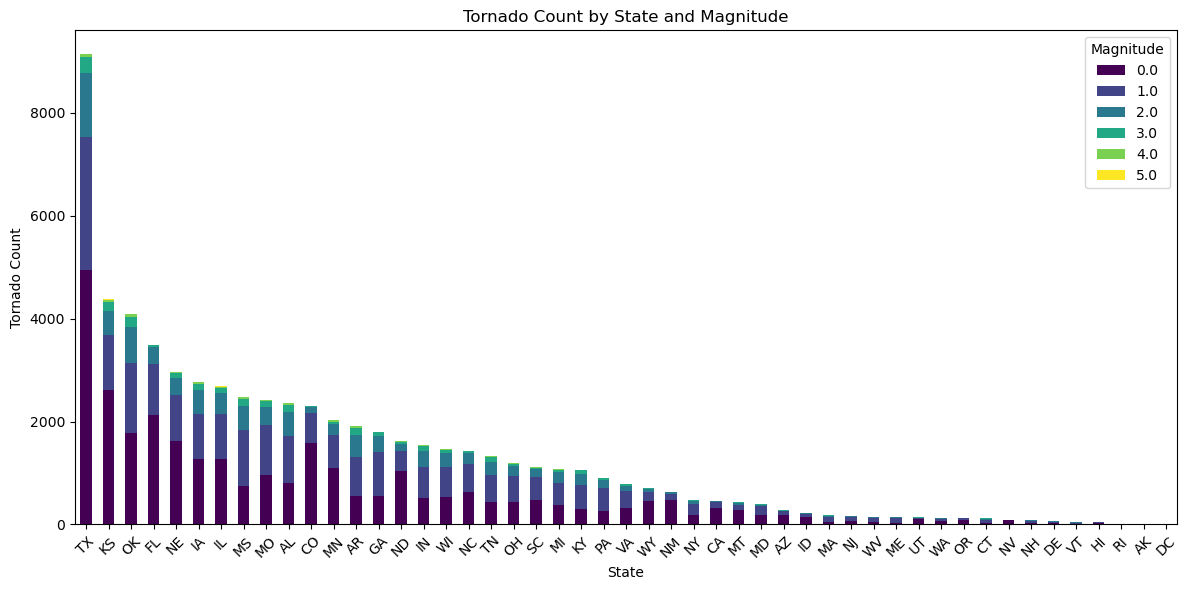

In [99]:
state_magnitude = s_tornado_data.groupby(['State', 'Magnitude']).size().unstack(fill_value=0)

state_magnitude_sorted = state_magnitude.sum(axis=1).sort_values(ascending=False)
state_magnitude_sorted = state_magnitude.loc[state_magnitude_sorted.index]

fig, ax = plt.subplots(figsize=(12, 6))
state_magnitude_sorted.plot(kind='bar', stacked=True, cmap='viridis', ax=ax)
ax.set_xlabel('State')
ax.set_ylabel('Tornado Count')
ax.set_title('Tornado Count by State and Magnitude')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Magnitude')
plt.tight_layout()
plt.show()

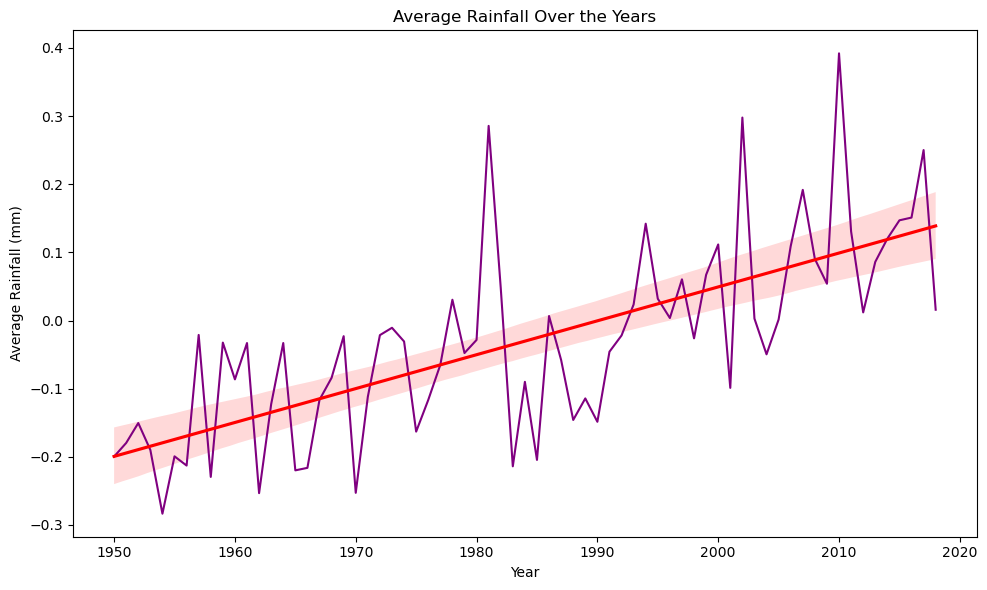

In [105]:
rainfall_avg = s_tornado_data.groupby('yr')['precipitation_mm'].mean()

plt.figure(figsize=(10, 6))
plt.plot(rainfall_avg.index, rainfall_avg, color='purple')
sns.regplot(x=rainfall_avg.index, y=rainfall_avg, scatter=False, color='red')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm)')
plt.title('Average Rainfall Over the Years')
plt.tight_layout()
plt.show()

C:\Users\theel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\theel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


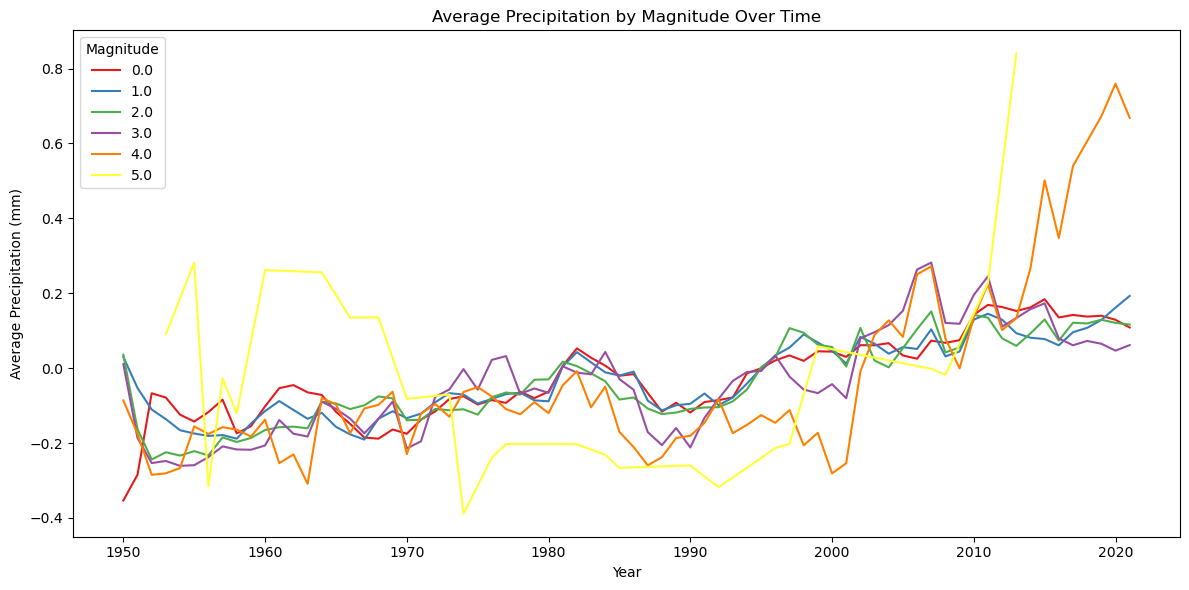

In [120]:
avg_precipitation_by_magnitude = s_tornado_data.groupby(['Magnitude', 'yr'])['precipitation_mm'].mean().reset_index()
avg_precipitation_by_magnitude['precipitation_mm'] = avg_precipitation_by_magnitude['precipitation_mm'].rolling(window=6, min_periods=1).mean()

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_precipitation_by_magnitude, x='yr', y='precipitation_mm', hue='Magnitude', palette='Set1')
plt.xlabel('Year')
plt.ylabel('Average Precipitation (mm)')
plt.title('Average Precipitation by Magnitude Over Time')
plt.legend(title='Magnitude')
plt.tight_layout()
plt.show()

## Correlation Analysis

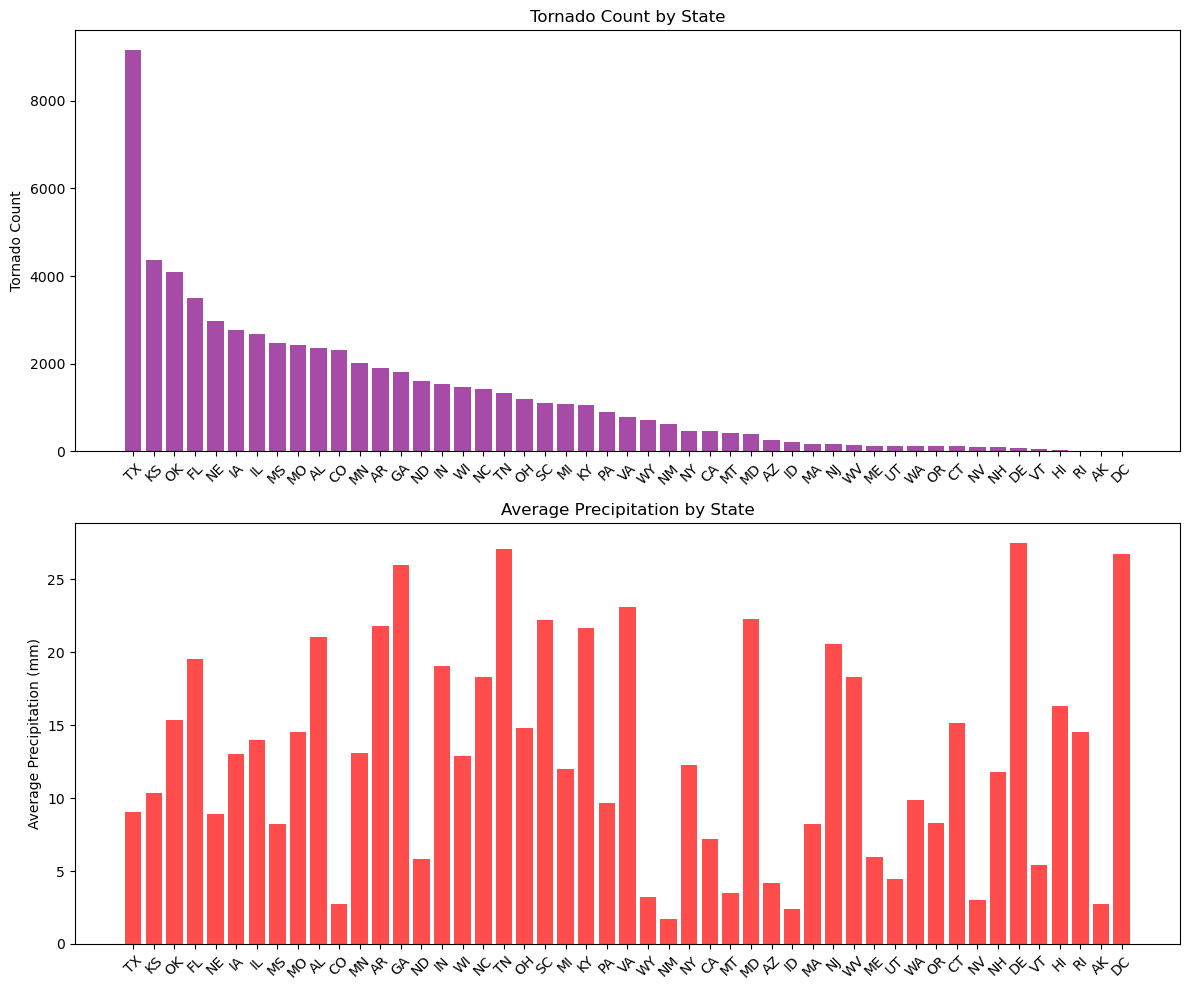

In [156]:
tornado_count_per_state = tornado_data.groupby('State').size().reset_index(name='Tornado Count')
tornado_count_per_state = tornado_count_per_state.sort_values(by='Tornado Count', ascending=False)

average_precipitation_per_state = tornado_data.groupby(['State', 'state_encoded'])['precipitation_mm'].mean().reset_index(name='Average Precipitation')
average_precipitation_per_state = average_precipitation_per_state.sort_values(by='State')

merged_data = pd.merge(tornado_count_per_state, average_precipitation_per_state, on='State', how='inner')

fig, axs = plt.subplots(2, 1, figsize=(12, 10))

axs[0].bar(merged_data['State'], merged_data['Tornado Count'], color='purple', alpha=0.7)
axs[0].set_ylabel('Tornado Count')
axs[0].set_title('Tornado Count by State')
axs[0].tick_params(axis='x', rotation=45)

axs[1].bar(merged_data['State'], merged_data['Average Precipitation'], color='red', alpha=0.7)
axs[1].set_ylabel('Average Precipitation (mm)')
axs[1].set_title('Average Precipitation by State')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [157]:
merged_data.head()

,State,Tornado Count,state_encoded,Average Precipitation
0,TX,9149,44,9.074139
1,KS,4375,16,10.328457
2,OK,4092,36,15.327419
3,FL,3497,9,19.541121
4,NE,2967,29,8.910618


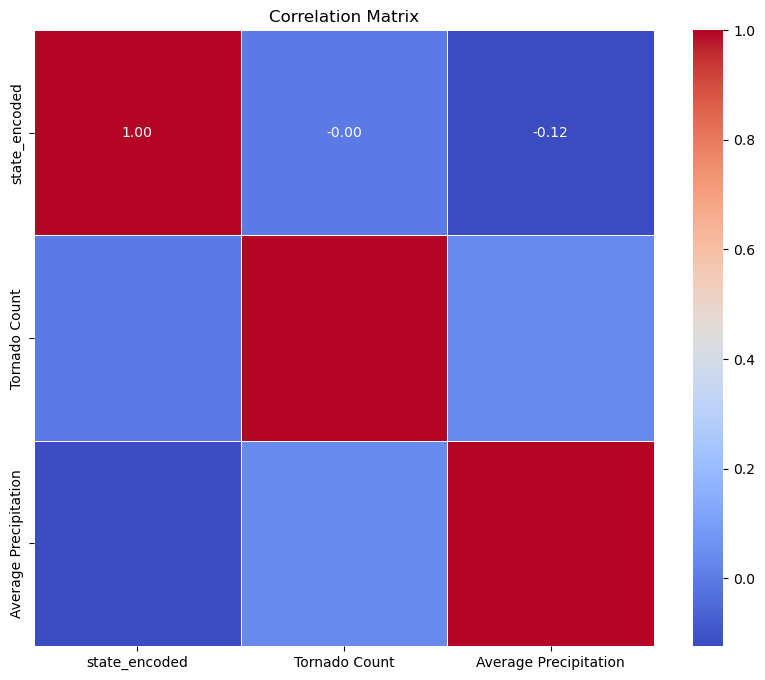

Summary Statistics:
       state_encoded  Tornado Count  Average Precipitation
count       3.000000       3.000000               3.000000
mean        0.290985       0.346465               0.306036
std         0.617012       0.566428               0.606725
min        -0.124166      -0.002879              -0.124166
25%        -0.063522       0.019697              -0.040947
50%        -0.002879       0.042273               0.042273
75%         0.498561       0.521136               0.521136
max         1.000000       1.000000               1.000000
Correlation Coefficient: 0.04227272783702032


In [160]:
matrix = merged_data[['state_encoded', 'Tornado Count', 'Average Precipitation']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

summary_statistics = matrix.describe()
print("Summary Statistics:")
print(summary_statistics)
correlation_coefficient = merged_data['Tornado Count'].corr(merged_data['Average Precipitation'])
print(f"Correlation Coefficient: {correlation_coefficient}")